In [1]:
import pandas as pd

In [136]:
gdp = pd.read_csv("/Users/margheritatonon/codinglab/data/gdp.csv")
olympics_medals = pd.read_csv("/Users/margheritatonon/codinglab/data/olympics_medals.csv")

## Data Cleaning and Processing

In [137]:
#Filling null values in the medal column
olympics_medals["medal"].fillna("No", inplace = True)

#Creating a Year column and a Season column
olympics_medals["Year"] = olympics_medals["edition"].str.split(" ").str[0]
olympics_medals["Season"] = olympics_medals["edition"].str.split(" ").str[1]

#Creating a Gender Column
olympics_medals["gender"] = olympics_medals["event"].str.split(",").str[-1]

#renaming the country_noc column to Code so it matches the gdp dataset
olympics_medals.rename(columns={"country_noc":"Code"}, inplace = True)
olympics_medals

/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipykernel_35130/152871202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics_medals["medal"].fillna("No", inplace = True)


,edition,edition_id,Code,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,Year,Season,gender
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,No,False,1908,Summer,Men
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,No,False,1908,Summer,Men
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,No,False,1908,Summer,Men
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,No,False,1908,Summer,Men
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,No,False,1908,Summer,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316829,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,No,False,2022,Winter,Women
316830,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,No,False,2022,Winter,Women
316831,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,No,False,2022,Winter,Women
316832,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,No,False,2022,Winter,Women


In [138]:
#We need to change the gender values because not all of them are exact.
men = olympics_medals["gender"].value_counts().index[0]
women = olympics_medals["gender"].value_counts().index[1]
open = olympics_medals["gender"].value_counts().index[2]
mixed = olympics_medals["gender"].value_counts().index[3]
boys = olympics_medals["gender"].value_counts().index[4]
dictionaryofgenders = {men:"Male", women:"Female", open:None, mixed:None, boys:"Male"}
olympics_medals["gender"] = olympics_medals["gender"].map(dictionaryofgenders)
olympics_medals

,edition,edition_id,Code,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,Year,Season,gender
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,No,False,1908,Summer,Male
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,No,False,1908,Summer,Male
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,No,False,1908,Summer,Male
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,No,False,1908,Summer,Male
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,No,False,1908,Summer,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316829,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,No,False,2022,Winter,Female
316830,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,No,False,2022,Winter,Female
316831,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,No,False,2022,Winter,Female
316832,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,No,False,2022,Winter,Female


In [139]:
#we can drop the pos column because it will not be useful in our analysis
olympics_medals.drop(columns = "pos", inplace = True)
olympics_medals

,edition,edition_id,Code,sport,event,result_id,athlete,athlete_id,medal,isTeamSport,Year,Season,gender
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,No,False,1908,Summer,Male
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,No,False,1908,Summer,Male
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,No,False,1908,Summer,Male
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,No,False,1908,Summer,Male
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,No,False,1908,Summer,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316829,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,No,False,2022,Winter,Female
316830,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,No,False,2022,Winter,Female
316831,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,No,False,2022,Winter,Female
316832,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,No,False,2022,Winter,Female


In [140]:
#renaming the gdp year column
gdp.rename(columns={"GDP per capita, PPP (constant 2017 international $)":"GDP"}, inplace = True)

## Merging the Datasets

In [142]:
#we want to merge the datasets so that we have the year, the country name, the number of medals, and the gdp.
#we do a groupby with the olympics_medals first, so we count the number of medals per year per country.
only_medals = olympics_medals[olympics_medals["medal"] != "No"]
num_medals = only_medals[["Year", "Code", "medal"]].groupby(by = ["Year", "Code"], as_index = False).count()
num_medals #this is the dataset we are going to merge with gdp

,Year,Code,medal
0,1896,AUS,4
1,1896,AUT,5
2,1896,DEN,6
3,1896,FRA,11
4,1896,GBR,11
...,...,...,...
1563,2022,SUI,15
1564,2022,SVK,26
1565,2022,SWE,34
1566,2022,UKR,1


In [143]:
#the GDP column has null values so maybe we want to fill these.
print(gdp[gdp["GDP"].isnull() == True])
indices = gdp[gdp["GDP"].isnull() == True].index
print(indices)

                   Entity Code  Year  GDP
3             Afghanistan  AFG  2005  NaN
16            Afghanistan  AFG  2018  NaN
34                Albania  ALB  2004  NaN
109                Angola  AGO  2013  NaN
123   Antigua and Barbuda  ATG  1994  NaN
...                   ...  ...   ...  ...
6355              Uruguay  URY  2014  NaN
6383           Uzbekistan  UZB  2009  NaN
6389           Uzbekistan  UZB  2015  NaN
6390           Uzbekistan  UZB  2016  NaN
6519               Zambia  ZMB  2013  NaN

[121 rows x 4 columns]
Index([   3,   16,   34,  109,  123,  239,  256,  274,  291,  322,
       ...
       5910, 6033, 6067, 6089, 6228, 6355, 6383, 6389, 6390, 6519],
      dtype='int64', length=121)


In [144]:
#filling in the null values by either taking the mean of the year before and after
#in case the year that is null is the last year, we the value of the prior year
#in case the year that is null is the first year, we take the value of the upcoming year.
for idx in indices:
    if gdp["Code"][idx] == gdp["Code"][idx+1]:
        gdp["GDP"][idx] = gdp["GDP"][idx+1]
    if gdp["Code"][idx] == gdp["Code"][idx-1]:
        gdp["GDP"][idx] = gdp["GDP"][idx-1]
    if gdp["Code"][idx-1] == gdp["Code"][idx+1]: 
        na = (gdp["GDP"][idx-1] + gdp["GDP"][idx+1])/2
        gdp["GDP"][idx] = na

/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipykernel_35130/301910653.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  gdp["GDP"][idx] = gdp["GDP"][idx+1]
/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipykernel_35130/301910653.py:

In [ ]:
#some null values still remain, however it is because the country code is NaN.

In [145]:
gdp[gdp["GDP"].isna() == True]

,Entity,Code,Year,GDP
1664,East Asia and Pacific (WB),NaN,2013,NaN
2484,High-income countries,NaN,1990,NaN
2500,High-income countries,NaN,2006,NaN
3195,Latin America and Caribbean (WB),NaN,2006,NaN
3882,Middle East and North Africa (WB),NaN,2002,NaN
5510,South Asia (WB),NaN,2005,NaN
6389,Uzbekistan,UZB,2015,NaN
6390,Uzbekistan,UZB,2016,NaN


In [146]:
#looking at UZB
gdp[gdp["Code"] == "UZB"]

,Entity,Code,Year,GDP
6364,Uzbekistan,UZB,1990,3638.8770
6365,Uzbekistan,UZB,1991,3544.5862
6366,Uzbekistan,UZB,1992,3074.6590
6367,Uzbekistan,UZB,1993,2936.4482
6368,Uzbekistan,UZB,1994,2729.6377
6369,Uzbekistan,UZB,1995,2656.6326
6370,Uzbekistan,UZB,1996,2650.6096
6371,Uzbekistan,UZB,1997,2736.3650
6372,Uzbekistan,UZB,1998,2808.4610
6373,Uzbekistan,UZB,1999,2897.8200


In [147]:
#uzbekistan remains null because there are 2 consecutive null values. we are going to fill these manually.
gdp["GDP"][6389] = (gdp["GDP"][6388] + gdp["GDP"][6391])/2
gdp["GDP"][6390] = (gdp["GDP"][6388] + gdp["GDP"][6391])/2

/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipykernel_35130/823143335.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  gdp["GDP"][6389] = (gdp["GDP"][6388] + gdp["GDP"][6391])/2
/var/folders/wh/tb4v5qlx5ssbclxjxm11t28r0000gn/T/ipyker

In [148]:
gdp[gdp["GDP"].isna() == True]

,Entity,Code,Year,GDP
1664,East Asia and Pacific (WB),NaN,2013,NaN
2484,High-income countries,NaN,1990,NaN
2500,High-income countries,NaN,2006,NaN
3195,Latin America and Caribbean (WB),NaN,2006,NaN
3882,Middle East and North Africa (WB),NaN,2002,NaN
5510,South Asia (WB),NaN,2005,NaN


In [149]:
#now we are ready to merge the datasets.
gdp

,Entity,Code,Year,GDP
0,Afghanistan,AFG,2002,1280.46310
1,Afghanistan,AFG,2003,1292.33350
2,Afghanistan,AFG,2004,1260.06050
3,Afghanistan,AFG,2005,1313.52685
4,Afghanistan,AFG,2006,1366.99320
...,...,...,...,...
6557,Zimbabwe,ZWE,2018,2399.62160
6558,Zimbabwe,ZWE,2019,2203.39670
6559,Zimbabwe,ZWE,2020,1990.31950
6560,Zimbabwe,ZWE,2021,2115.14450


In [150]:
num_medals

,Year,Code,medal
0,1896,AUS,4
1,1896,AUT,5
2,1896,DEN,6
3,1896,FRA,11
4,1896,GBR,11
...,...,...,...
1563,2022,SUI,15
1564,2022,SVK,26
1565,2022,SWE,34
1566,2022,UKR,1


In [158]:
#we need to make sure the data types are consistent with each other (gdp year is int but medals year was object)
num_medals["Year"] = num_medals["Year"].astype(int)
num_medals.dtypes

Year      int64
Code     object
medal     int64
dtype: object

In [159]:
merged = pd.merge(gdp, num_medals, on = ["Code", "Year"])
merged

,Entity,Code,Year,GDP,medal
0,Afghanistan,AFG,2008,1556.8445,1
1,Afghanistan,AFG,2012,2122.8308,1
2,Argentina,ARG,1992,16190.5110,2
3,Argentina,ARG,1996,18031.5490,24
4,Argentina,ARG,2000,18524.8100,20
...,...,...,...,...,...
575,Uzbekistan,UZB,2004,3430.6287,5
576,Uzbekistan,UZB,2008,4457.6990,4
577,Uzbekistan,UZB,2012,5472.8335,3
578,Uzbekistan,UZB,2016,6457.9512,13


In [160]:
merged.to_csv("merged.csv")

## Predictive Model

doing some last modifying of the dataframes and removing outliers

In [161]:
merged

,Entity,Code,Year,GDP,medal
0,Afghanistan,AFG,2008,1556.8445,1
1,Afghanistan,AFG,2012,2122.8308,1
2,Argentina,ARG,1992,16190.5110,2
3,Argentina,ARG,1996,18031.5490,24
4,Argentina,ARG,2000,18524.8100,20
...,...,...,...,...,...
575,Uzbekistan,UZB,2004,3430.6287,5
576,Uzbekistan,UZB,2008,4457.6990,4
577,Uzbekistan,UZB,2012,5472.8335,3
578,Uzbekistan,UZB,2016,6457.9512,13


In [162]:
#model that predicts the number of medals based on GDP
#we can first plot these to see which model would best fit the data.

In [163]:
import matplotlib.pyplot as plt

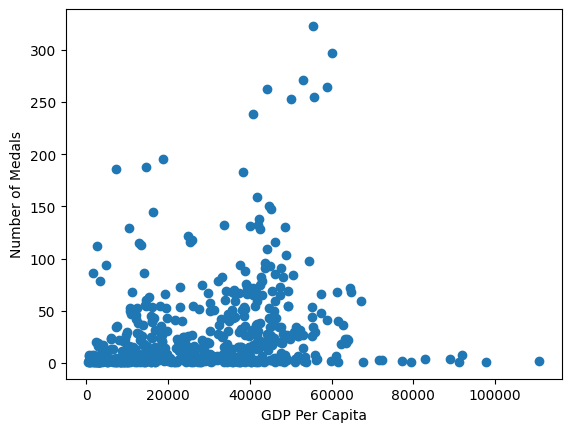

In [169]:
plt.scatter(merged["GDP"], merged["medal"])
plt.ylabel("Number of Medals")
plt.xlabel("GDP Per Capita")
plt.show()

In [177]:
#what is happening with the countries that have a high GDP but low medals?
#observing the values:
sorted = merged.sort_values(by = ["GDP", "medal"], ascending = False)
sorted.head(11)
#you can see that the countries with high GDP but low medals are very small yet rich countries
# their size could thus influence the number of medals they win at the olympics, possibly because they have less athletes to send 

,Entity,Code,Year,GDP,medal
407,Qatar,QAT,2012,110752.690,2
408,Qatar,QAT,2016,97783.120,1
255,Ireland,IRL,2020,91791.440,8
437,Singapore,SGP,2016,91270.640,1
409,Qatar,QAT,2020,89019.070,4
436,Singapore,SGP,2012,82886.780,4
406,Qatar,QAT,2000,79400.430,1
334,Luxembourg,LUX,1992,77215.295,2
254,Ireland,IRL,2016,72293.210,3
435,Singapore,SGP,2008,71534.980,3


In [233]:
#these are outliers in our data - we are going to remove them
newmerged = merged.drop(sorted.head(11).index)
newmerged.reset_index(inplace = True)
newmerged.drop(columns = "index", inplace = True)
newmerged

,Entity,Code,Year,GDP,medal
0,Afghanistan,AFG,2008,1556.8445,1
1,Afghanistan,AFG,2012,2122.8308,1
2,Argentina,ARG,1992,16190.5110,2
3,Argentina,ARG,1996,18031.5490,24
4,Argentina,ARG,2000,18524.8100,20
...,...,...,...,...,...
564,Uzbekistan,UZB,2004,3430.6287,5
565,Uzbekistan,UZB,2008,4457.6990,4
566,Uzbekistan,UZB,2012,5472.8335,3
567,Uzbekistan,UZB,2016,6457.9512,13


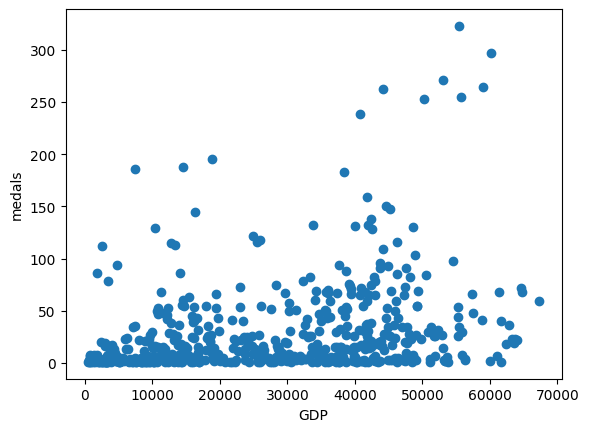

In [235]:
plt.scatter(newmerged["GDP"], newmerged["medal"])
plt.xlabel("GDP")
plt.ylabel("medals")
plt.show()

#### quadratic regression

trying quadratic regression:

our model would be of the form:

y = ß0 + ß1x + ß2x^2

we need to find ß0, ß1, and ß2

polynomial regression with scikit learn: https://data36.com/polynomial-regression-python-scikit-learn/

In [180]:
import numpy as np

In [193]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [270]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [271]:
#setting the x and y
x = np.array(newmerged["GDP"])
y = np.array(newmerged["medal"])

In [272]:
poly_features = poly.fit_transform(x.reshape(-1, 1)) #creates an array. the first value is x, the second will have x^2
poly_features

array([[1.00000000e+00, 1.55684450e+03, 2.42376480e+06],
       [1.00000000e+00, 2.12283080e+03, 4.50641061e+06],
       [1.00000000e+00, 1.61905110e+04, 2.62132646e+08],
       ...,
       [1.00000000e+00, 5.47283350e+03, 2.99519065e+07],
       [1.00000000e+00, 6.45795120e+03, 4.17051337e+07],
       [1.00000000e+00, 7.40772750e+03, 5.48744267e+07]])

In [273]:
poly_reg_model = LinearRegression()

In [274]:
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [275]:
print(poly_reg_model.coef_) #b1 and then b2
print(poly_reg_model.intercept_) #b0

[0.00000000e+00 4.34255883e-04 6.41266845e-09]
10.349816377652036


In [283]:
y_predicted = poly_reg_model.intercept_ + poly_reg_model.coef_[1] * x + poly_reg_model.coef_[2] * (x**2)

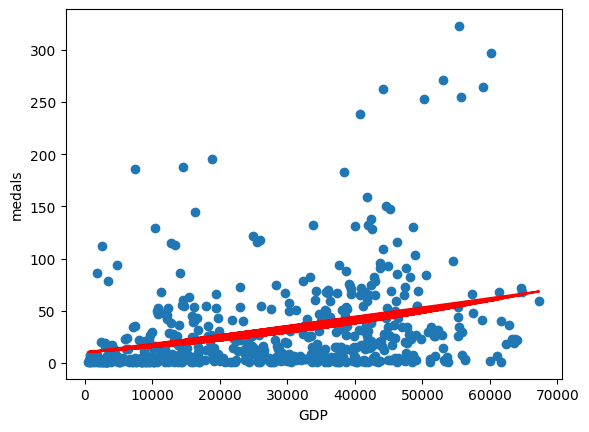

In [281]:
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.xlabel("GDP")
plt.ylabel("medals")
plt.show()

In [305]:
#we pick sorted x's to improve the plot
orderedx = np.linspace(newmerged["GDP"].min(), newmerged["GDP"].max(), 100)
orderedy = poly_reg_model.intercept_ + poly_reg_model.coef_[1] * orderedx + poly_reg_model.coef_[2] * (orderedx**2)

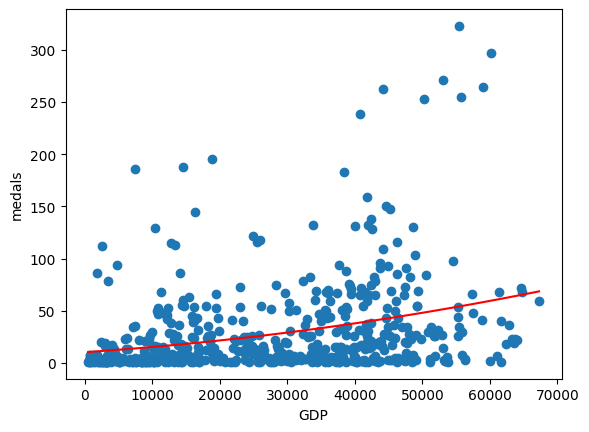

In [319]:
plt.scatter(x, y)
plt.plot(orderedx, orderedy, c="red")
plt.xlabel("GDP")
plt.ylabel("medals")
plt.show()

In [245]:
#the quadratic model is clearly not a very good fit for the data.

#### cubic regression

In [262]:
poly_1 = PolynomialFeatures(degree=3, include_bias=True)
x = np.array(newmerged["GDP"])
y = np.array(newmerged["medal"])
poly_1_features = poly_1.fit_transform(x.reshape(-1, 1))
poly_reg_model_1 = LinearRegression()
poly_reg_model_1.fit(poly_1_features, y)
print(poly_reg_model_1.coef_) #b1 and then b2 and then b3
print(poly_reg_model_1.intercept_) #b0

[0.00000000e+00 4.54244389e-04 5.61355008e-09 8.59152646e-15]
10.245177070056464


In [278]:
y_predicted_1 = poly_reg_model_1.intercept_ + poly_reg_model_1.coef_[1] * x + poly_reg_model_1.coef_[2] * (x**2) + poly_reg_model_1.coef_[3]*(x**3)

In [308]:
#we pick sorted x's to improve the plot
orderedx_1 = np.linspace(newmerged["GDP"].min(), newmerged["GDP"].max(), 100)
orderedy_1 = poly_reg_model_1.intercept_ + poly_reg_model_1.coef_[1] * orderedx_1 + poly_reg_model_1.coef_[2] * (orderedx_1**2)

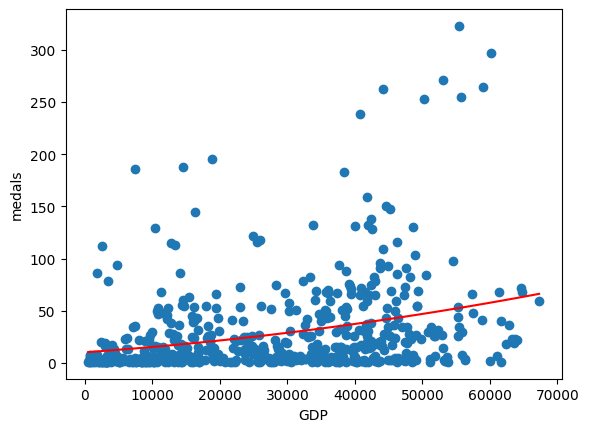

In [318]:
plt.scatter(x, y)
plt.plot(orderedx_1, orderedy_1, c="red")
plt.xlabel("GDP")
plt.ylabel("medals")
plt.show()

## two separate models: cut at 30000

We saw that the data was very varied and had a lot of values that would skew the model. for that reason, we decided that we would split the data at GDP = 30,000 to hopefully get models that would better fit the data.

In [315]:
newmerged["labels"] = pd.cut(newmerged["GDP"], bins=[0, 30000, newmerged["GDP"].max()], labels=["Low", "High"])
lowgdp = newmerged[newmerged["labels"] == "Low"]
highgdp = newmerged[newmerged["labels"] == "High"]

### low

In [330]:
lowgdp

,Entity,Code,Year,GDP,medal,labels
0,Afghanistan,AFG,2008,1556.8445,1,Low
1,Afghanistan,AFG,2012,2122.8308,1,Low
2,Argentina,ARG,1992,16190.5110,2,Low
3,Argentina,ARG,1996,18031.5490,24,Low
4,Argentina,ARG,2000,18524.8100,20,Low
...,...,...,...,...,...,...
564,Uzbekistan,UZB,2004,3430.6287,5,Low
565,Uzbekistan,UZB,2008,4457.6990,4,Low
566,Uzbekistan,UZB,2012,5472.8335,3,Low
567,Uzbekistan,UZB,2016,6457.9512,13,Low


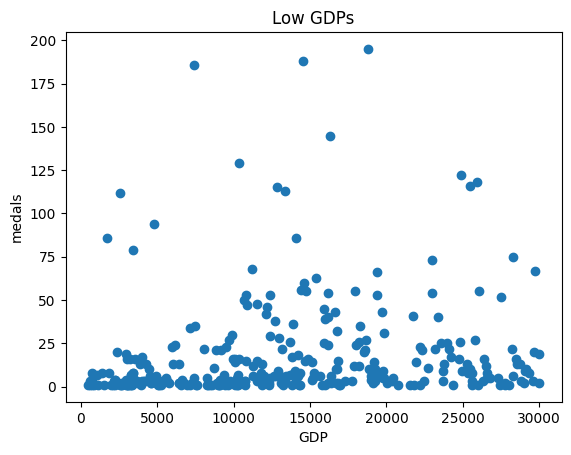

In [342]:
plt.scatter(lowgdp["GDP"], lowgdp["medal"])
plt.xlabel("GDP")
plt.ylabel("medals")
plt.title("Low GDPs")
plt.show()

fitting a quadratic model to this

In [326]:
poly = PolynomialFeatures(degree=2, include_bias=True)
#setting the x and y
x_2 = np.array(lowgdp["GDP"])
y_2 = np.array(lowgdp["medal"])
#create an array. the first value is x, the second will have x^2
poly_features = poly.fit_transform(x_2.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_2)
print(poly_reg_model.coef_) #b1 and then b2
print(poly_reg_model.intercept_) #b0

[ 0.00000000e+00  2.06213620e-03 -5.21908014e-08]
2.9768475808885384


In [331]:
#creating an ordered array so the data can be plotted easier
orderedx_2 = np.linspace(lowgdp["GDP"].min(), lowgdp["GDP"].max(), 100)
orderedy_2 = poly_reg_model.intercept_ + poly_reg_model.coef_[1] * orderedx_2 + poly_reg_model.coef_[2] * (orderedx_2 ** 2)

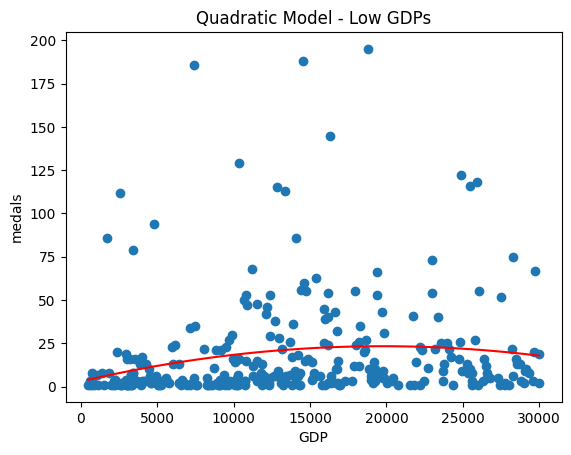

In [341]:
plt.scatter(lowgdp["GDP"], lowgdp["medal"])
plt.plot(orderedx_2, orderedy_2, c="red")
plt.xlabel("GDP")
plt.ylabel("medals")
plt.title("Quadratic Model - Low GDPs")
plt.show()

### high

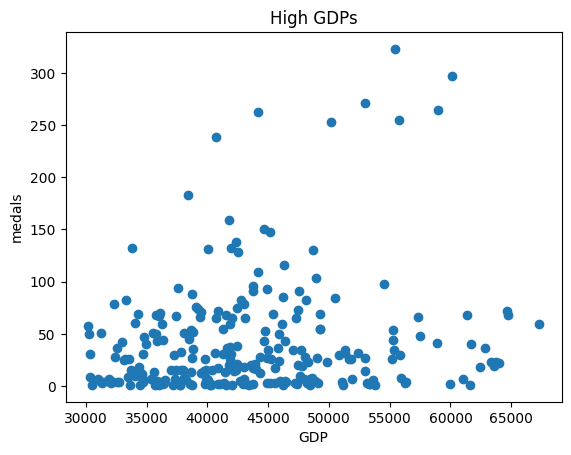

In [340]:
plt.scatter(highgdp["GDP"], highgdp["medal"])
plt.xlabel("GDP")
plt.ylabel("medals")
plt.title("High GDPs")
plt.show()

#### quadratic

In [336]:
poly = PolynomialFeatures(degree=2, include_bias=True)
#setting the x and y
x_3 = np.array(highgdp["GDP"])
y_3 = np.array(highgdp["medal"])
#create an array. the first value is x, the second will have x^2
poly_features = poly.fit_transform(x_3.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_3)
print(poly_reg_model.coef_) #b1 and then b2
print(poly_reg_model.intercept_) #b0

[ 0.00000000e+00  4.29619914e-03 -3.36371996e-08]
-79.23602854788267


In [337]:
orderedx_3 = np.linspace(highgdp["GDP"].min(), highgdp["GDP"].max(), 100)
orderedy_3 = poly_reg_model.intercept_ + poly_reg_model.coef_[1] * orderedx_3 + poly_reg_model.coef_[2] * (orderedx_3 ** 2)

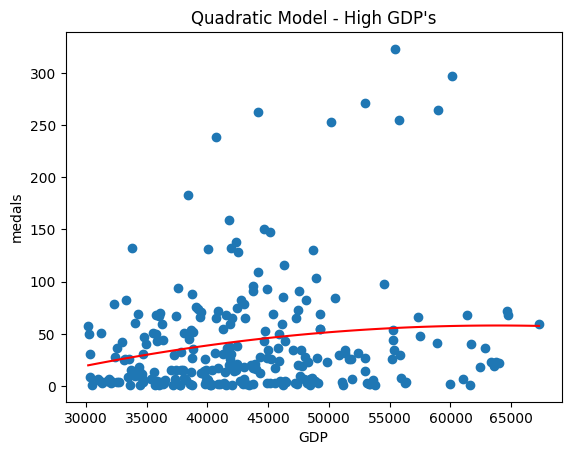

In [339]:
plt.scatter(highgdp["GDP"], highgdp["medal"])
plt.plot(orderedx_3, orderedy_3, c="red")
plt.xlabel("GDP")
plt.ylabel("medals")
plt.title("Quadratic Model - High GDP's")
plt.show()

we now have a piecewise model to predict the number of medals from the GDP.